<a href="https://colab.research.google.com/github/hammadkhan30/Famrers-Tweet-Analysis-and-Visualization/blob/main/Farmers_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
consumer_key= 'OmMrEQKJ2sLmFerZfdCx3AdoE'
consumer_secret= 'q4sAkEbACtNfwkyPwBUUIJAuYhsYGeBmJ8uQ8CORRMsWIJlhMx'
access_token= '217053771-fwY0H9fvsC8nChs8IT1MjApYSltu55QmvqlmrRDF'
access_token_secret= 'nHHr5FzeOd10ZLU6RLFLGYzoz84bSqQoasnpxJgsOjbfM'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "#farmers+bill -filter:retweets"
tweets = tw.Cursor(api.search,q=search_term,lang="en").items(1000)
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['कृषि सुधार अध्यादेश तालाब में से छोटी मछलियां हटाकर बड़े मगरमच्छ छोड़ना है @PMOIndia please understand these small… https://t.co/5DsOHcXOiz',
 'Pakistani puppet Gurpatwant Singh Pannu again lured money to Sikhs under the guise of Anti-farmer Bill Protest. Thi… https://t.co/N9fNc4Y2ZZ',
 '#save #farmers #protest against black bill .. i support #FarmersProtest',
 'Good news #SFJ Releases $1Million For \n#Punjab #Haryana #Farmers to\nHelp them in their fight against the farmer bil… https://t.co/2pGpqrl0DY',
 "@Republic_Bharat Did you know what's happening in north india due to 3 Bill's?? We can say that #farmers are on… https://t.co/VQlrLRFrjY"]

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['PMOIndia please understand these small',
 'Pakistani puppet Gurpatwant Singh Pannu again lured money to Sikhs under the guise of Antifarmer Bill Protest Thi',
 'save farmers protest against black bill i support FarmersProtest',
 'Good news SFJ Releases 1Million For Punjab Haryana Farmers toHelp them in their fight against the farmer bil',
 'RepublicBharat Did you know whats happening in north india due to 3 Bills We can say that farmers are on']

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['pmoindia', 'please', 'understand', 'these', 'small'],
 ['pakistani',
  'puppet',
  'gurpatwant',
  'singh',
  'pannu',
  'again',
  'lured',
  'money',
  'to',
  'sikhs',
  'under',
  'the',
  'guise',
  'of',
  'antifarmer',
  'bill',
  'protest',
  'thi']]

In [ ]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)

[('farmers', 98),
 ('bill', 65),
 ('the', 56),
 ('to', 43),
 ('is', 33),
 ('of', 32),
 ('for', 31),
 ('punjab', 25),
 ('and', 25),
 ('releases', 22),
 ('haryana', 21),
 ('1million', 20),
 ('sfj', 18),
 ('in', 18),
 ('anti', 18)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])
clean_tweets_no_urls.head()

,words,count
0,farmers,98
1,bill,65
2,the,56
3,to,43
4,is,33


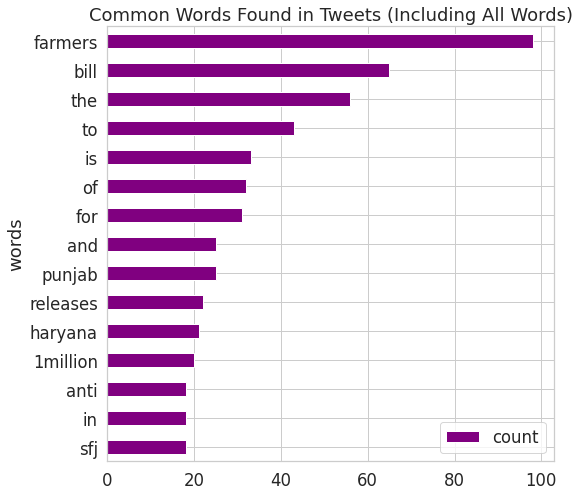

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]

['an',
 'weren',
 'does',
 'more',
 'doesn',
 'other',
 'mustn',
 'what',
 'our',
 "you'll"]

In [ ]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
tweets_nsw[0]

['pmoindia', 'please', 'understand', 'small']

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('farmers', 98),
 ('bill', 65),
 ('punjab', 25),
 ('releases', 22),
 ('haryana', 21),
 ('1million', 20),
 ('sfj', 18),
 ('anti', 18),
 ('farmer', 14),
 ('amp', 12),
 ('indian', 9),
 ('protest', 8),
 ('india', 8),
 ('khalistan', 8),
 ('farm', 8)]

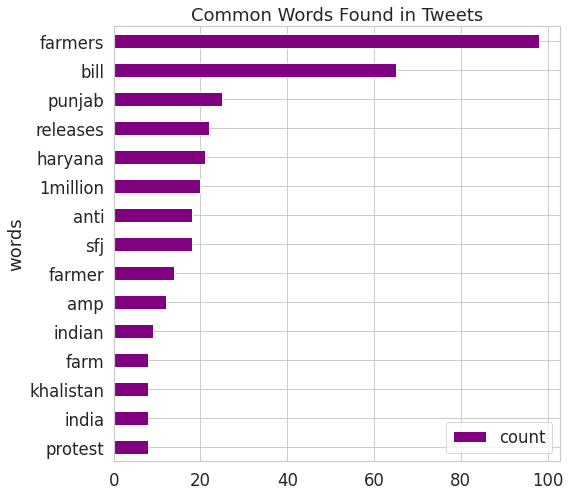

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Common Words Found in Tweets")
plt.show()